# PI 1: EDA

## Import Libs

In [289]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Create DF's

In [290]:
df_amazon = pd.read_csv('Datasets/amazon_prime_titles.csv')
df_disney = pd.read_csv('Datasets/disney_plus_titles.csv')
df_hulu = pd.read_csv('Datasets/hulu_titles.csv')
df_netflix = pd.read_json('Datasets/netflix_titles.json')


# Amazon

## Estructure Investigation

In [291]:
df_amazon.info()  # General info about DF.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [292]:
df_amazon.head()  # First five elements.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [293]:
df_amazon.tail()  # Last five elements.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."
9667,s9668,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",NaN,NaN,2010,R,103 min,"Action, Drama, Suspense","Harry Brown, starring two-time Academy Award w..."


In [294]:
df_amazon.describe(exclude='number')  # Describe numerical features


,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,9668,9668,9668,7586,8435,672,155,9331,9668,9668,9668
unique,9668,2,9668,5774,7927,86,84,24,219,518,9414
top,s1,Movie,The Grand Seduction,Mark Knight,Maggie Binkley,United States,"March 30, 2021",13+,1 Season,Drama,"Arpo was designed as a commando robot, built a..."
freq,1,7814,1,113,56,253,14,2117,1342,986,15


In [295]:
df_amazon.describe()  # Describe numerical features


,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


## Feature Investigation

In [296]:
# The added date has no function for the future, so I discard it

df_amazon.drop(columns='date_added', inplace=True)


In [297]:
# Amount of duplicates

columns_names = df_amazon.columns
n_duplicates = df_amazon.drop(labels=columns_names, axis=1).duplicated().sum()

n_duplicates


0

Text(0, 0.5, 'Sample Number')

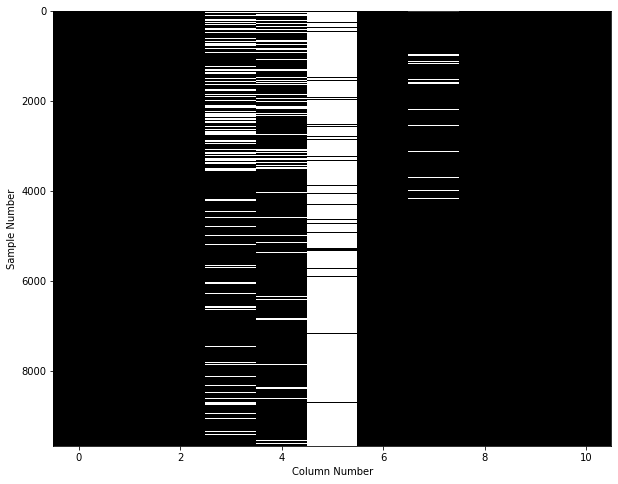

In [298]:
# Graph for view the amount of null values

plt.figure(figsize=(10, 8))
plt.imshow(df_amazon.isna(), aspect="auto",
           interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")


added_date has a lot of missing values.

<AxesSubplot: title={'center': 'Percentage of missing values per feature'}, ylabel='Ratio of missing values per feature'>

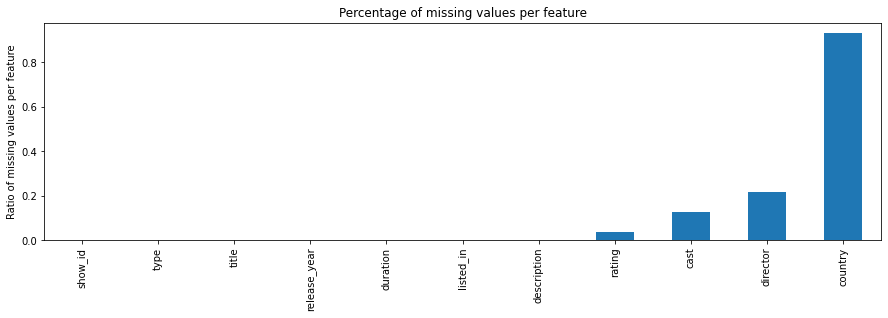

In [299]:
# missing values per feature

df_amazon.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature")


The columns with missing values are: rating, cast, directior and country

In [300]:
# Amount of null values.
df_amazon.country.isnull().sum()
df_amazon.director.isnull().sum()
df_amazon.cast.isnull().sum()
df_amazon.rating.isnull().sum()


337

## Conclusions

In amazon dataframe we have a total of 9668 rows with 12 columns  (11 after delete added_date).

Columns with missing values are:

* Country: 8996 null values.
* Director: 2082 null values.
* Cast: 1233 null values.
* Rating: 337 null values.

Don´t have duplicate rows.

(This labels can be filled with with: 1° Data of the other datasets, 2° a web scraping api to collect missing movie data)

This Dataframe only have 2 types so i think the best to do is create a movie table and a TV show table.
Can abstract the country column to a County tables with unique values and uses that like a pivot for search in the movies table.
Rename listen_in to genres for better description.
Make trim operations to erase every inusual char in the strings labels.
Normalize cast, director, tittle and country strings with Tittle format.
Show_id isn't necessary

# Disney

## Estructure Investigation


In [301]:
df_disney.info()  # General info about DF


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [302]:
df_disney.head()  # First five elements.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [303]:
df_disney.tail()  # Last five elements.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...
1449,s1450,Movie,Captain Sparky vs. The Flying Saucers,Mark Waring,Charlie Tahan,United States,"April 1, 2020",2012,TV-G,2 min,"Action-Adventure, Animals & Nature, Animation",View one of Sparky's favorite home movies.


In [304]:
df_disney.describe(exclude='number')  # Describe numerical features


,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,1450,1450,1450,977,1260,1231,1447,1447,1450,1450,1450
unique,1450,2,1450,609,1193,89,167,9,158,329,1448
top,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,Jack Hannah,Winston Hibler,United States,"November 12, 2019",TV-G,1 Season,"Animation, Comedy, Family","Cooper and Cami Wrather co-host ""Would You Wra..."
freq,1,1052,1,17,10,1005,722,318,219,124,2


In [305]:
df_disney.describe()  # Describe numerical features


,release_year
count,1450.000000
mean,2003.091724
std,21.860162
min,1928.000000
25%,1999.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


## Feature Investigation


In [306]:
# The added date has no function for the future, so I discard it

df_disney.drop(columns='date_added', inplace=True)


In [307]:

# Amount of duplicates

columns_names = df_disney.columns
n_duplicates = df_disney.drop(labels=columns_names, axis=1).duplicated().sum()

n_duplicates


0

Text(0, 0.5, 'Sample Number')

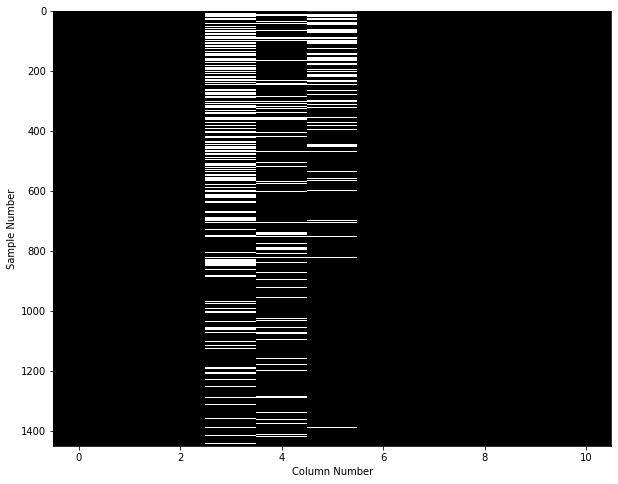

In [308]:

# Graph for view the amount of null values

plt.figure(figsize=(10, 8))
plt.imshow(df_disney.isna(), aspect="auto",
           interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")


<AxesSubplot: title={'center': 'Percentage of missing values per feature'}, ylabel='Ratio of missing values per feature'>

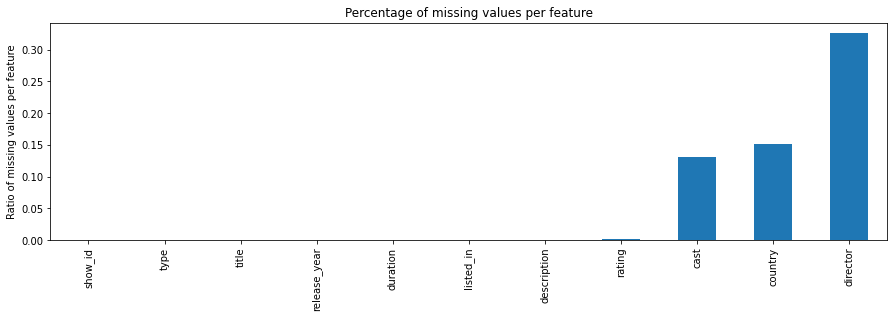

In [309]:

# missing values per feature

df_disney.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature")



The columns with missing values are: rating, cast, directior and country



In [310]:

# Amount of null values.
df_disney.country.isnull().sum()
df_disney.director.isnull().sum()
df_disney.cast.isnull().sum()
df_disney.rating.isnull().sum()


3

## Conclusions

In Disney dataframe we have a total of 1450 rows with 12 columns  (11 after delete added_date).

Columns with missing values are:

* Country: 219 null values.
* Director: 473 null values.
* Cast: 190 null values.
* Rating: 3 null values.

Don´t have duplicate rows.

(This labels can be filled with with: 1° Data of the other datasets, 2° a web scraping api to collect missing movie data)

This Dataframe only have 2 types so i think the best to do is create a movie table and a TV show table.
Can abstract the country column to a County tables with unique values and uses that like a pivot for search in the movies table.
Rename listen_in to genres for better description.
Make trim operations to erase every inusual char in the strings labels.
Normalize cast, director, tittle and country strings with Tittle format.
Show_id isn't necessary

# Hulu

## Estructure Investigation

In [311]:

df_hulu.info()  # General info about DF


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       3073 non-null   object 
 1   type          3073 non-null   object 
 2   title         3073 non-null   object 
 3   director      3 non-null      object 
 4   cast          0 non-null      float64
 5   country       1620 non-null   object 
 6   date_added    3045 non-null   object 
 7   release_year  3073 non-null   int64  
 8   rating        2553 non-null   object 
 9   duration      2594 non-null   object 
 10  listed_in     3073 non-null   object 
 11  description   3069 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 288.2+ KB


In [312]:
df_hulu.head()  # First five elements.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,NaN,NaN,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,NaN,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,NaN,NaN,"October 22, 2021",2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...


In [313]:
df_hulu.tail()  # Last five elements.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3068,s3069,TV Show,Star Trek: The Original Series,NaN,NaN,United States,NaN,1966,TV-PG,3 Seasons,"Action, Adventure, Classics",The 23rd century adventures of Captain James T...
3069,s3070,TV Show,Star Trek: Voyager,NaN,NaN,United States,NaN,1997,TV-PG,7 Seasons,"Action, Adventure, Science Fiction",Catapulted into the distant sector of the gala...
3070,s3071,TV Show,The Fades,NaN,NaN,United Kingdom,NaN,2011,TV-14,1 Season,"Horror, International, Science Fiction",Seventeen-year-old Paul is haunted by apocalyp...
3071,s3072,TV Show,The Twilight Zone,NaN,NaN,United States,NaN,1959,TV-PG,5 Seasons,"Classics, Science Fiction, Thriller",Rod Serling's seminal anthology series focused...
3072,s3073,TV Show,Tokyo Magnitude 8.0,NaN,NaN,Japan,NaN,2009,TV-14,1 Season,"Anime, Drama, International",The devastation is unleashed in the span of se...


In [314]:
df_hulu.describe(exclude='number')  # Describe numerical features


,show_id,type,title,director,country,date_added,rating,duration,listed_in,description
count,3073,3073,3073,3,1620,3045,2553,2594,3073,3069
unique,3073,2,3073,3,150,1115,88,135,442,3057
top,s1,TV Show,Ricky Velez: Here's Everything,"Director Jennifer Kent (""The Babadook"") tells ...",United States,"October 1, 2021",TV-14,1 Season,Documentaries,High-profile architect Alexandra faces her wor...
freq,1,1589,1,1,921,92,691,829,214,2


In [315]:
df_hulu.describe()  # Describe numerical features

,cast,release_year
count,0.0,3073.000000
mean,NaN,2012.567524
std,NaN,10.844069
min,NaN,1923.000000
25%,NaN,2010.000000
50%,NaN,2016.000000
75%,NaN,2019.000000
max,NaN,2021.000000


## Feature Investigation

In [316]:

# The added date has no function for the future, so I discard it

df_hulu.drop(columns='date_added', inplace=True)


In [317]:


# Amount of duplicates

columns_names = df_hulu.columns
n_duplicates = df_hulu.drop(labels=columns_names, axis=1).duplicated().sum()

n_duplicates



0

Text(0, 0.5, 'Sample Number')

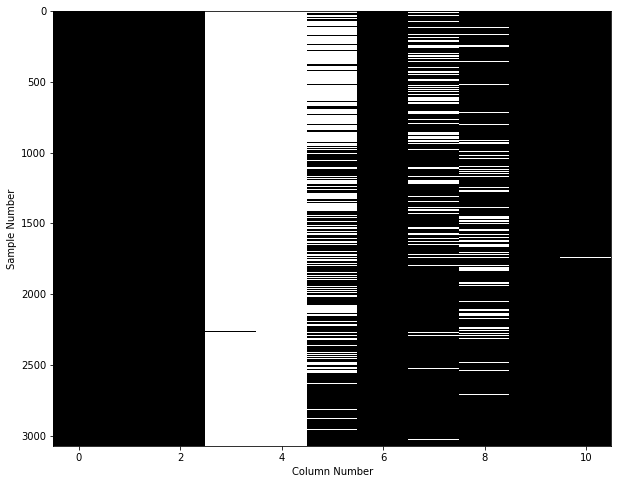

In [318]:

# Graph for view the amount of null values

plt.figure(figsize=(10, 8))
plt.imshow(df_hulu.isna(), aspect="auto",
           interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")


<AxesSubplot: title={'center': 'Percentage of missing values per feature'}, ylabel='Ratio of missing values per feature'>

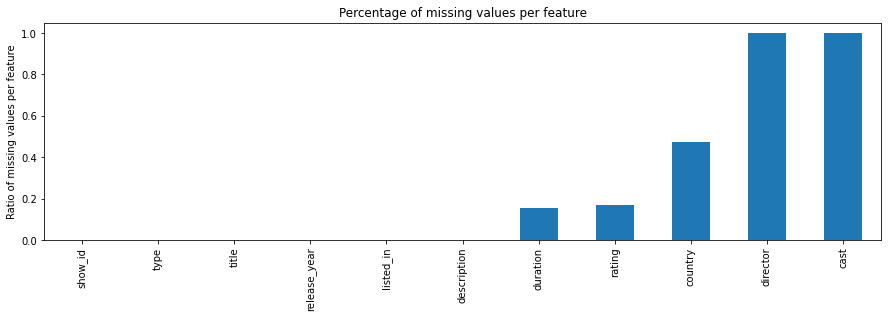

In [319]:


# missing values per feature

df_hulu.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature")




The columns with missing values are: duration, rating, cast, directior and country



In [320]:


# Amount of null values.
df_hulu.duration.isnull().sum()
df_hulu.country.isnull().sum()
df_hulu.director.isnull().sum()
df_hulu.cast.isnull().sum()
df_hulu.rating.isnull().sum()


520

## Conclusions

In Hulu dataframe we have a total of 3073 rows with 12 columns  (11 after delete added_date).

Columns with missing values are:

* Duration: 520 null values.
* Country: 1453 null values.
* Director: 3070 null values.
* Cast: 3073 null values.
* Rating: 520 null values.

Don´t have duplicate rows.

(This labels can be filled with with: 1° Data of the other datasets, 2° a web scraping api to collect missing movie data)

This Dataframe only have 2 types so i think the best to do is create a movie table and a TV show table.
Can abstract the country column to a County tables with unique values and uses that like a pivot for search in the movies table.
Rename listen_in to genres for better description.
Make trim operations to erase every inusual char in the strings labels.
Normalize cast, director, tittle and country strings with Tittle format.
Show_id isn't necessary

# Netflix

## Estructure Investigation

In [321]:
df_netflix.info()  # General infoS about DF

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.5+ KB


In [322]:
df_netflix.head()  # First five elements.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,None,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",None,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,None,None,None,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,None,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [323]:
df_netflix.tail()  # Last five elements.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,None,None,None,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [324]:
df_netflix.describe(exclude='number')  # Describe numerical features

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [325]:
df_netflix.describe()  # Describe numerical features

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Feature Investigation


In [326]:
# The added date has no function for the future, so I discard it

df_netflix.drop(columns='date_added', inplace=True)

In [327]:
# Amount of duplicates

columns_names = df_netflix.columns
n_duplicates = df_netflix.drop(labels=columns_names, axis=1).duplicated().sum()

n_duplicates

0

Text(0, 0.5, 'Sample Number')

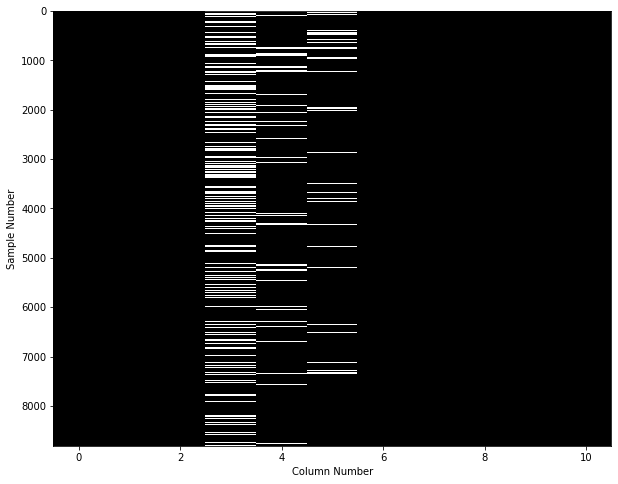

In [328]:
# Graph for view the amount of null values

plt.figure(figsize=(10, 8))
plt.imshow(df_netflix.isna(), aspect="auto",
           interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

<AxesSubplot: title={'center': 'Percentage of missing values per feature'}, ylabel='Ratio of missing values per feature'>

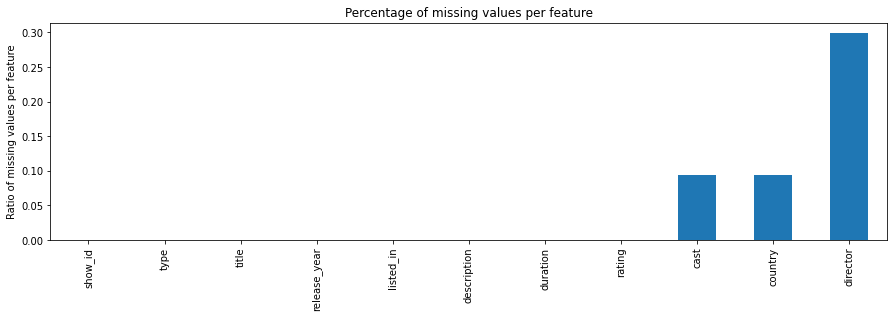

In [329]:
# missing values per feature

df_netflix.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature")

The columns with missing values are: cast, director and country

In [330]:
# Amount of null values.
df_netflix.duration.isnull().sum()
df_netflix.country.isnull().sum()
df_netflix.director.isnull().sum()
df_netflix.cast.isnull().sum()
df_netflix.rating.isnull().sum()

4

## Conclusions

In Hulu dataframe we have a total of 3073 rows with 12 columns  (11 after delete added_date).

Columns with missing values are:

* Duration: 3 null values.
* Country: 831 null values.
* Director: 2634 null values.
* Cast: 825 null values.
* Rating: 4 null values.

Don´t have duplicate rows.

(This labels can be filled with with: 1° Data of the other datasets, 2° a web scraping api to collect missing movie data)

This Dataframe only have 2 types so i think the best to do is create a movie table and a TV show table.
Can abstract the country column to a County tables with unique values and uses that like a pivot for search in the movies table.
Rename listen_in to genres for better description.
Make trim operations to erase every inusual char in the strings labels.
Normalize cast, director, tittle and country strings with Tittle format.
Show_id isn't necessary